In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sklearn
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
dataset = pd.DataFrame(data.data,columns = data.feature_names)
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y = pd.DataFrame(data.target)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [7]:
print(y.isna().any())
y.value_counts()

0    False
dtype: bool


1    357
0    212
dtype: int64

In [8]:
dataset.shape

(569, 30)

In [9]:
dataset.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [10]:
dataset.dtypes.value_counts()

float64    30
dtype: int64

In [11]:
for i in dataset.columns:
    print(i,"---",len(dataset[i].unique()))

mean radius --- 456
mean texture --- 479
mean perimeter --- 522
mean area --- 539
mean smoothness --- 474
mean compactness --- 537
mean concavity --- 537
mean concave points --- 542
mean symmetry --- 432
mean fractal dimension --- 499
radius error --- 540
texture error --- 519
perimeter error --- 533
area error --- 528
smoothness error --- 547
compactness error --- 541
concavity error --- 533
concave points error --- 507
symmetry error --- 498
fractal dimension error --- 545
worst radius --- 457
worst texture --- 511
worst perimeter --- 514
worst area --- 544
worst smoothness --- 411
worst compactness --- 529
worst concavity --- 539
worst concave points --- 492
worst symmetry --- 500
worst fractal dimension --- 535


In [12]:
dataset.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


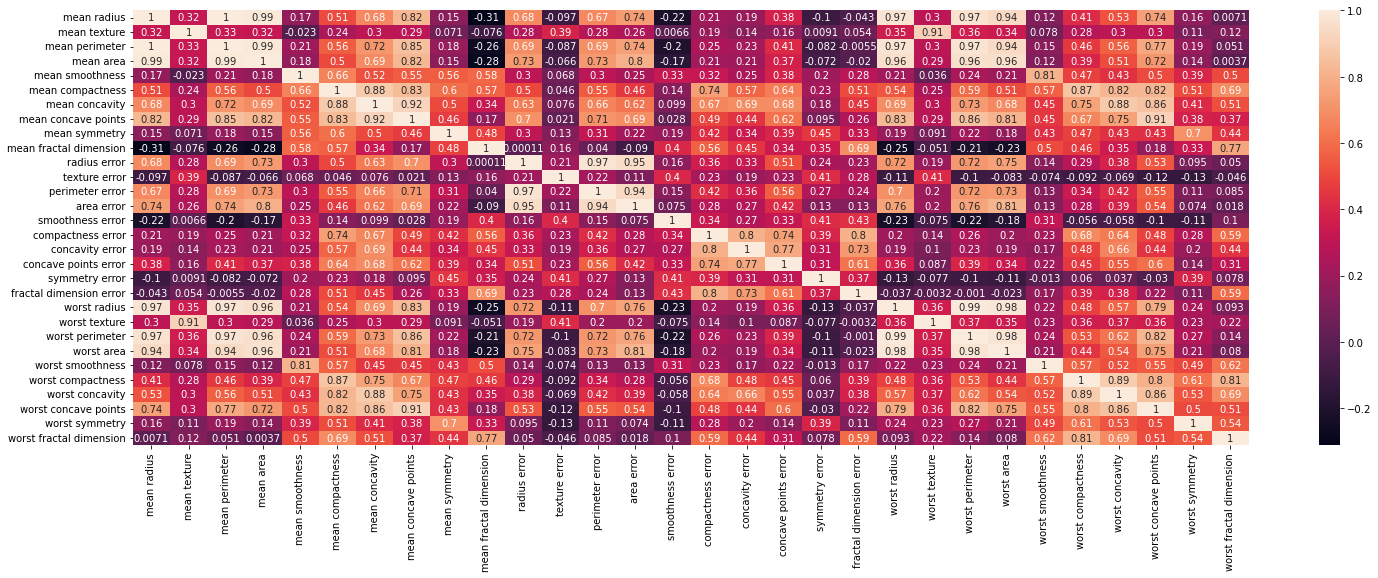

In [13]:
plt.figure(figsize = (25,8))
sns.heatmap(dataset.corr(),annot = True)
plt.show()

#### Although there is multicollinearity between features i am not removing them, the reason can be seen in the "Breast cancer data - full analysis and modelling" file in the conclusion 

mean radius


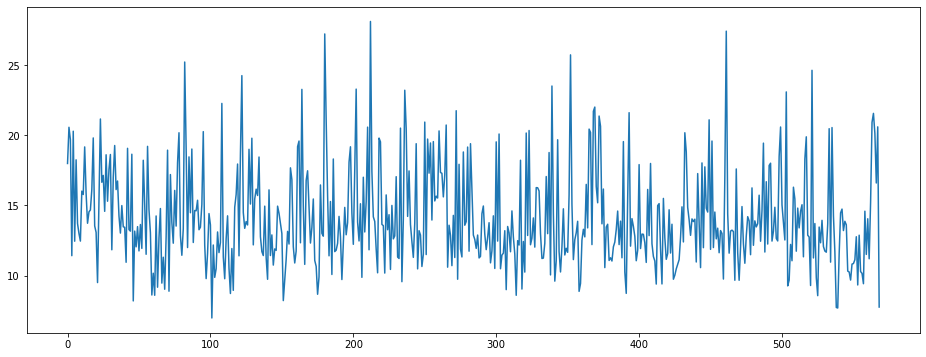

mean texture


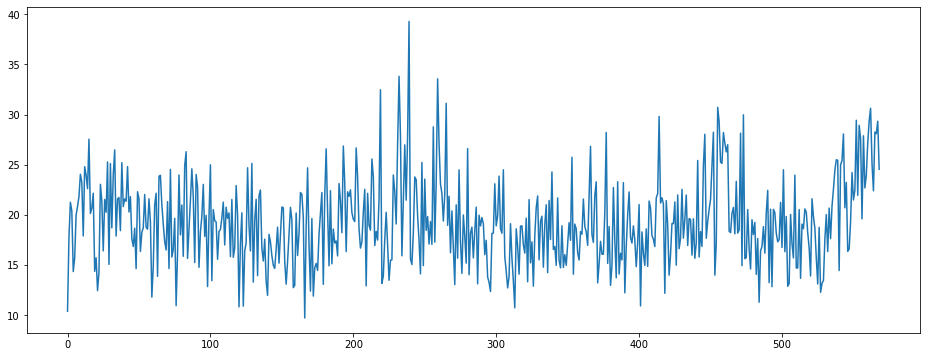

mean perimeter


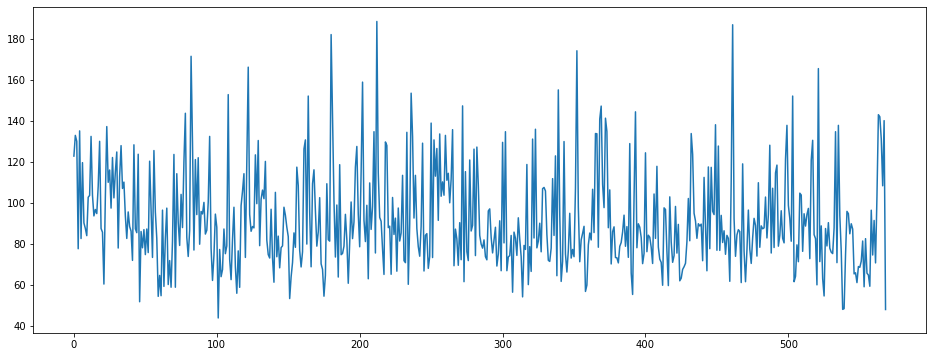

mean area


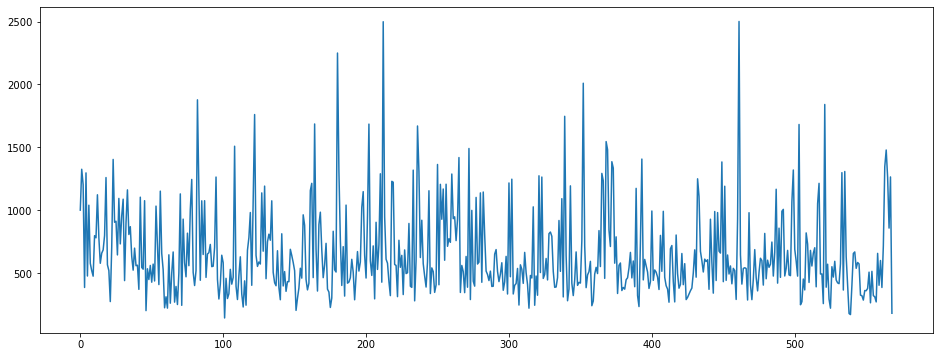

mean smoothness


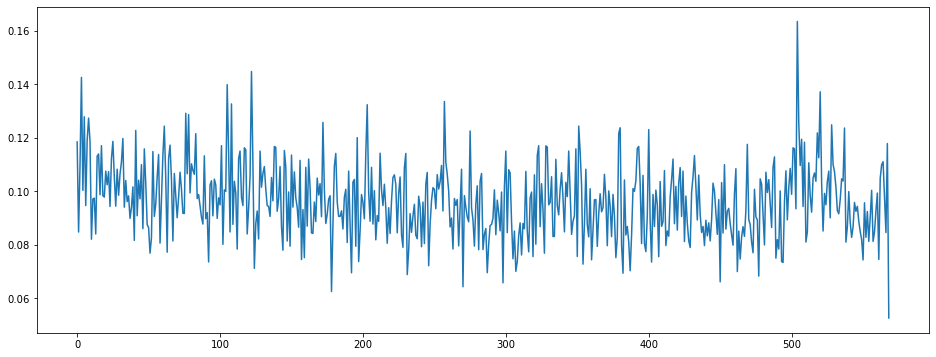

mean compactness


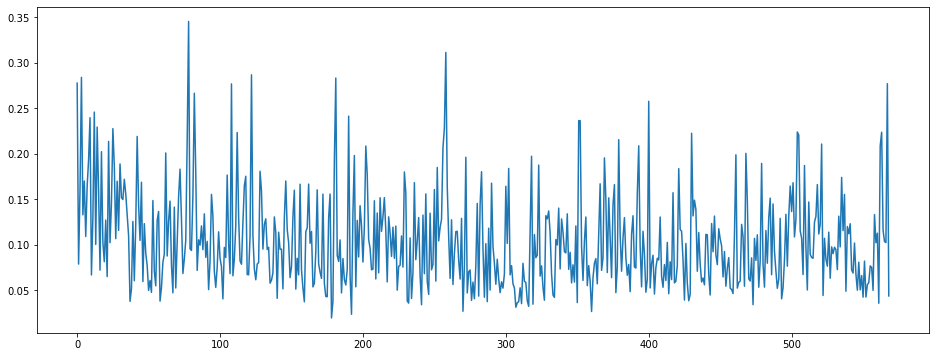

mean concavity


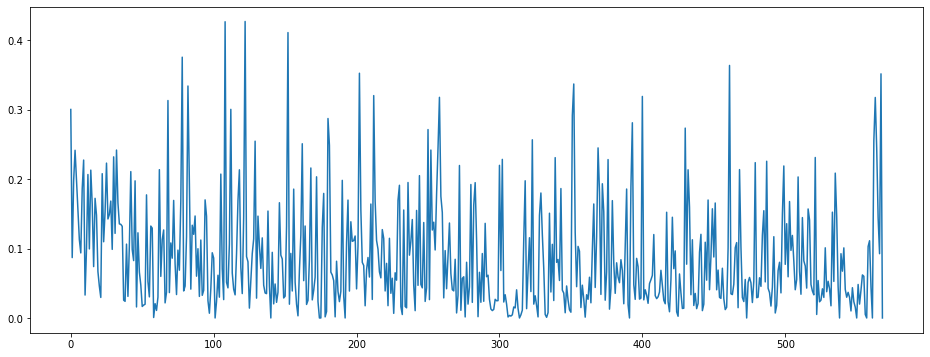

mean concave points


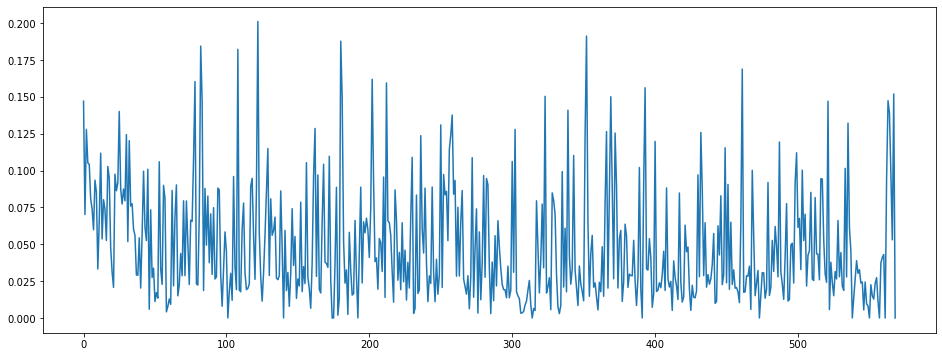

mean symmetry


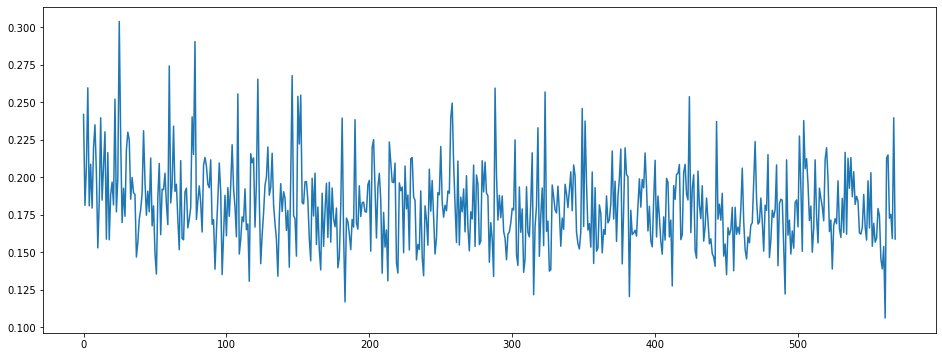

mean fractal dimension


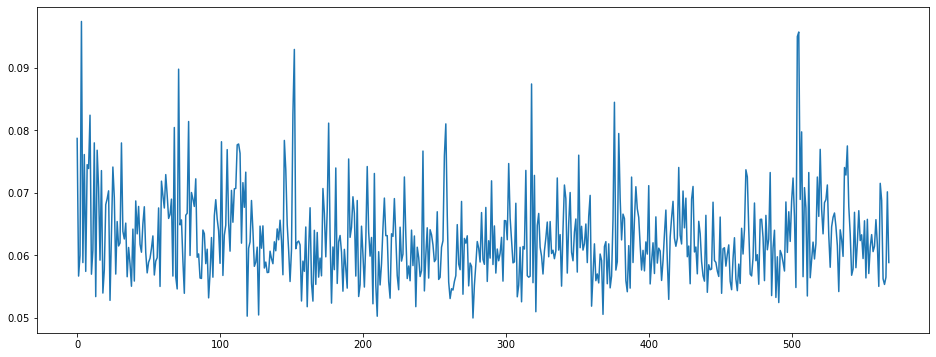

radius error


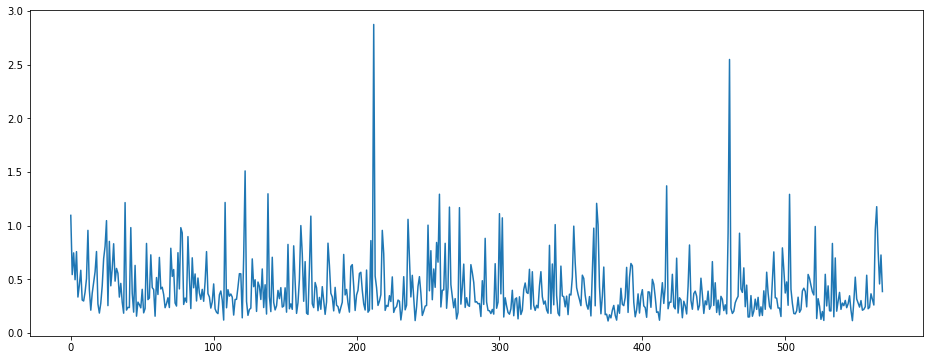

texture error


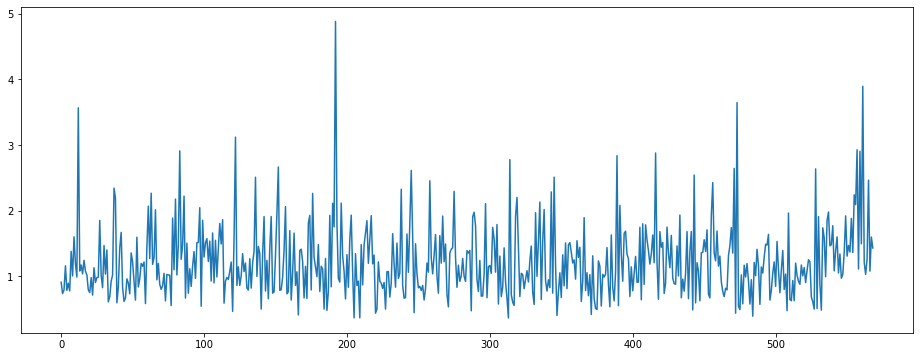

perimeter error


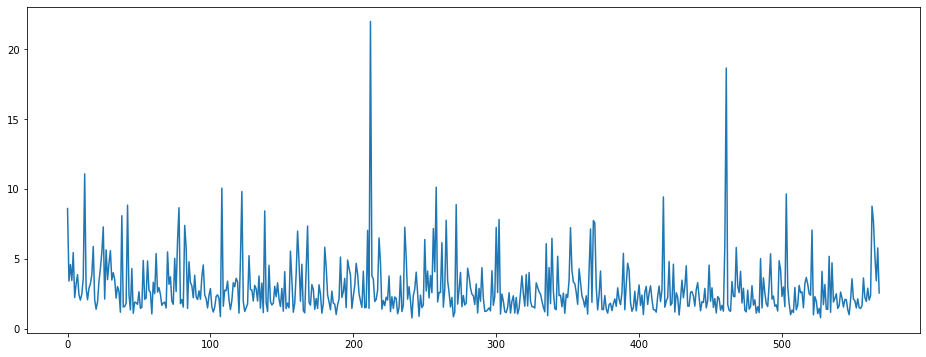

area error


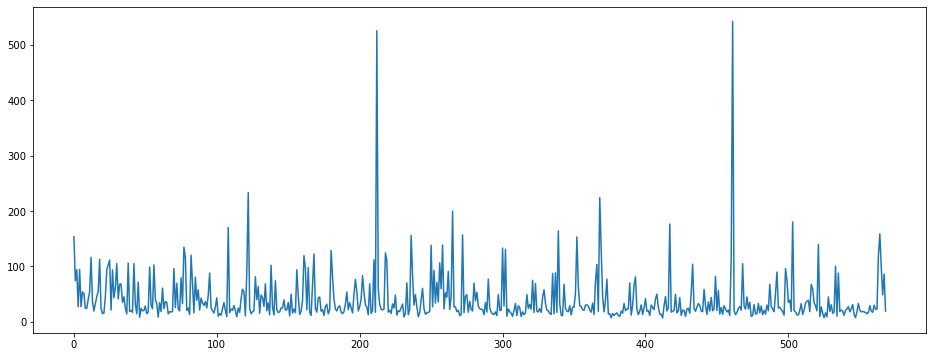

smoothness error


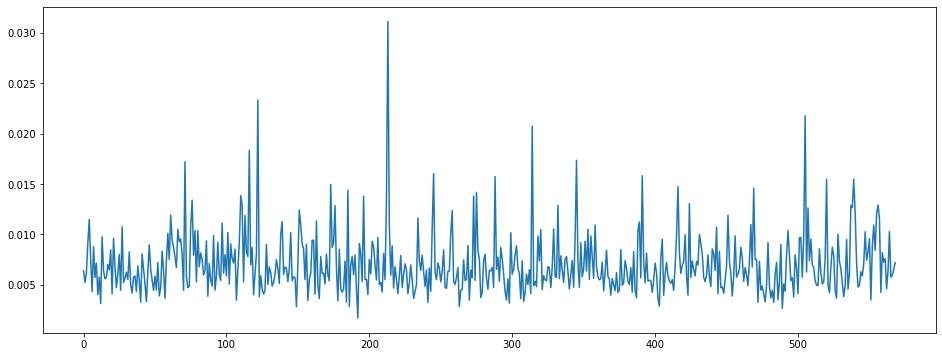

compactness error


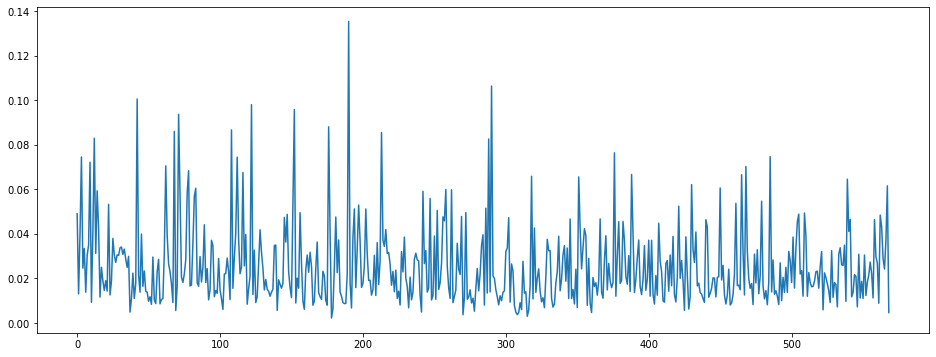

concavity error


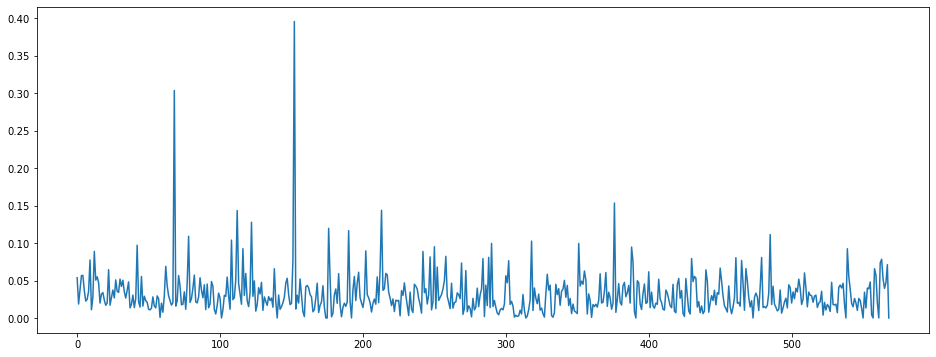

concave points error


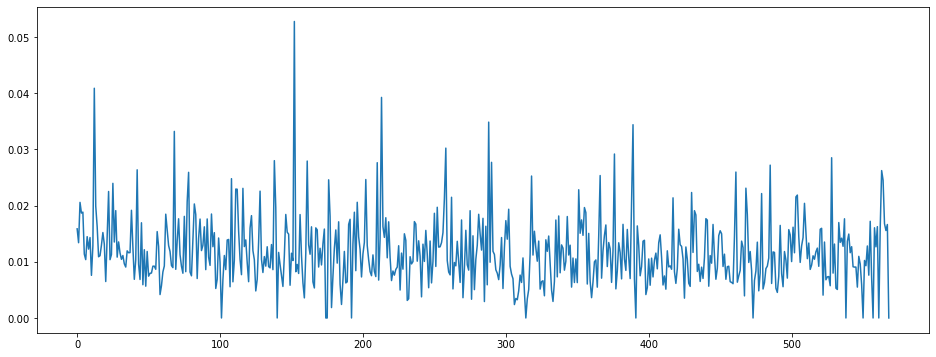

symmetry error


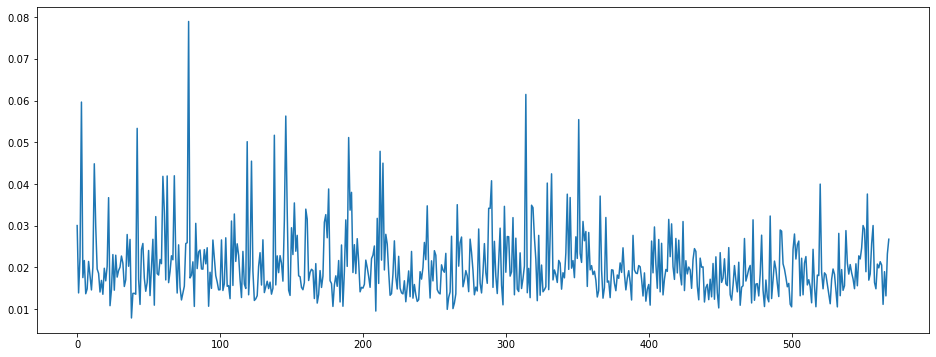

fractal dimension error


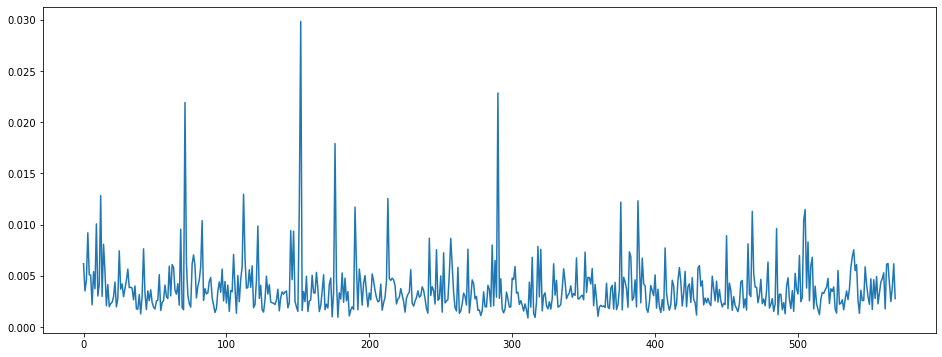

worst radius


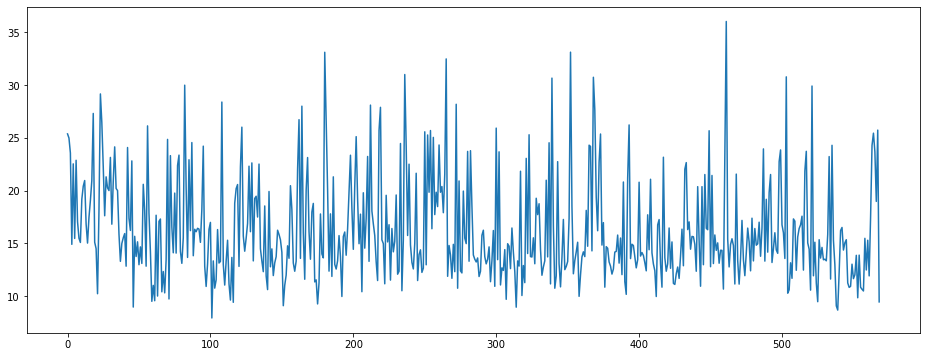

worst texture


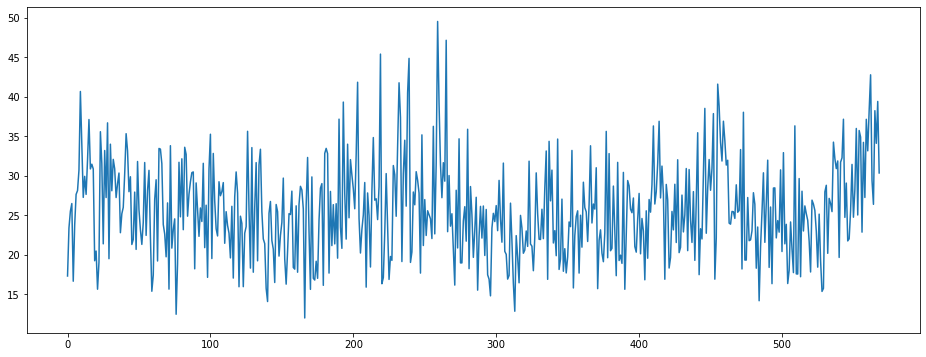

worst perimeter


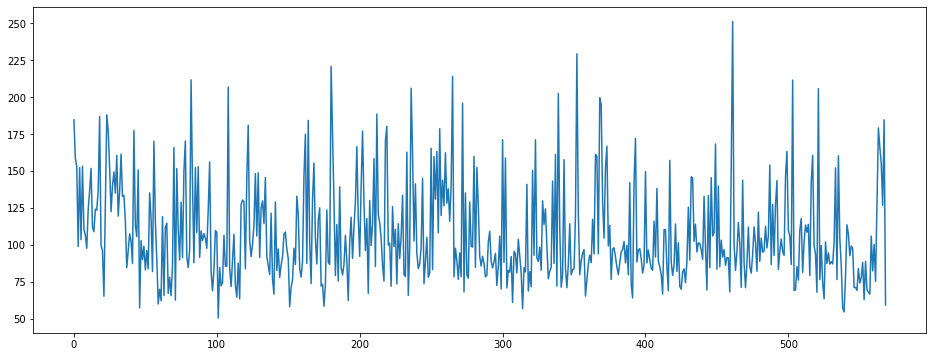

worst area


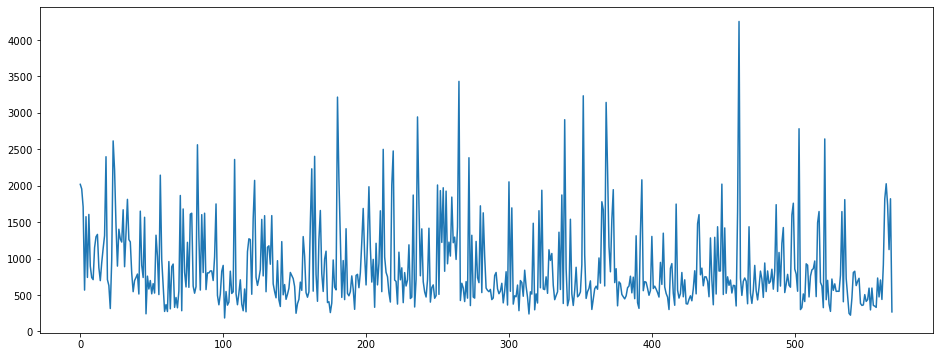

worst smoothness


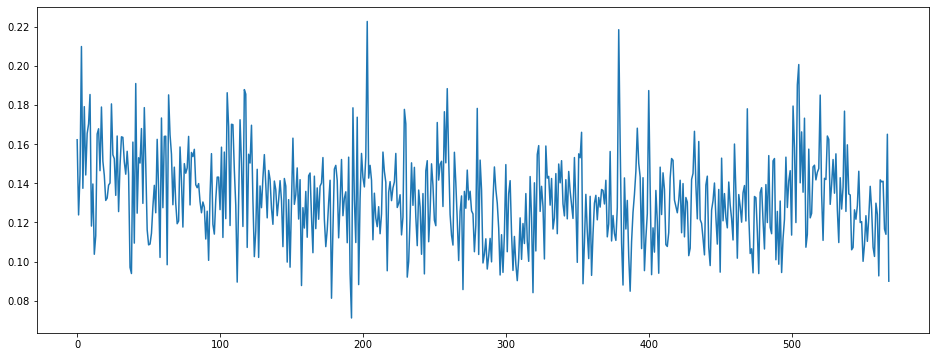

worst compactness


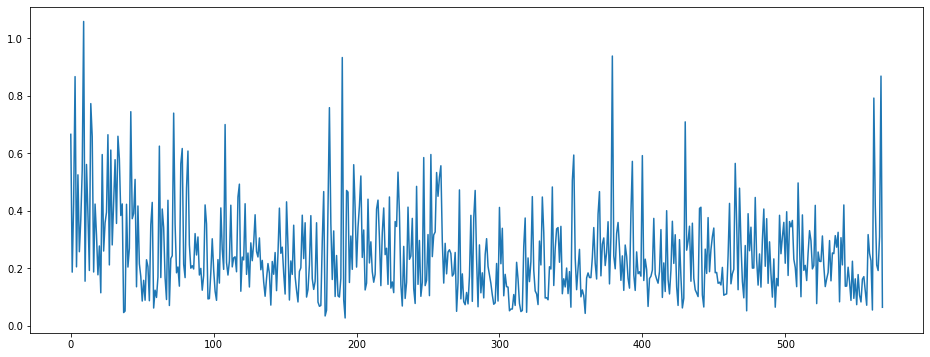

worst concavity


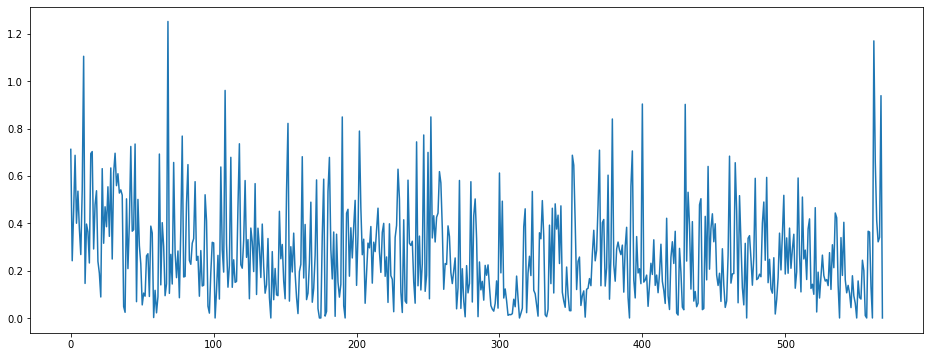

worst concave points


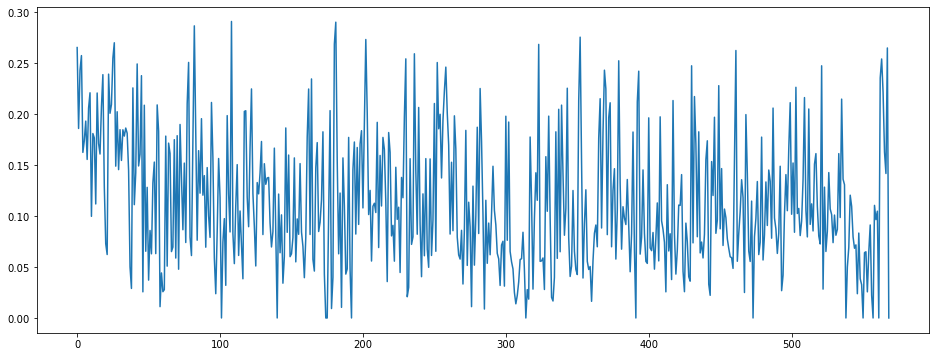

worst symmetry


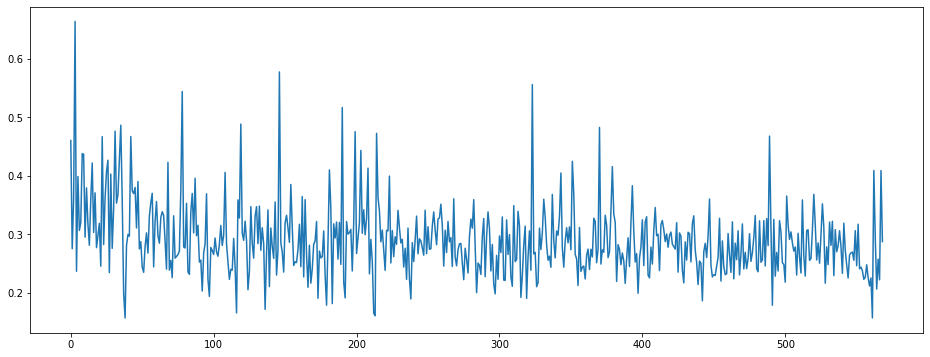

worst fractal dimension


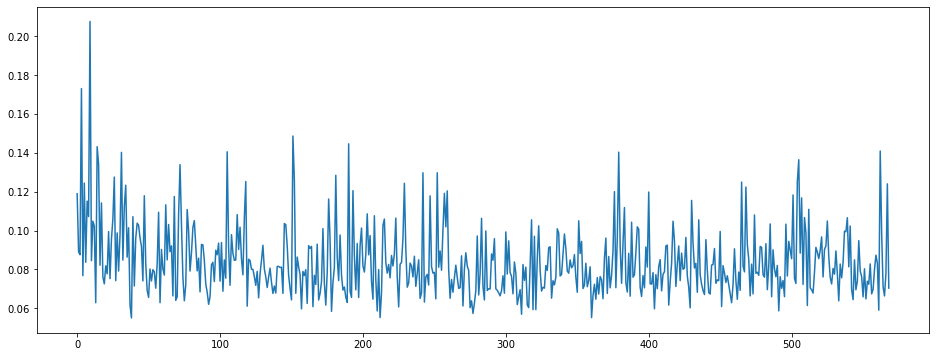

In [15]:
for i in dataset.columns:
    plt.figure(figsize = (16,6))
    print(i)
    plt.plot(dataset[i])
    plt.show()

mean radius


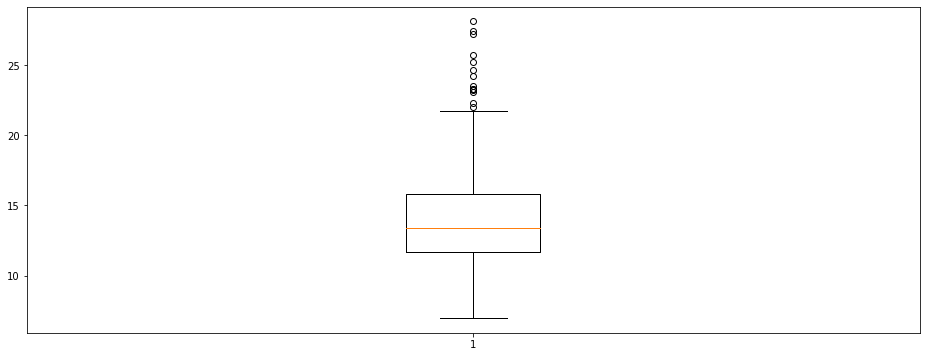

mean texture


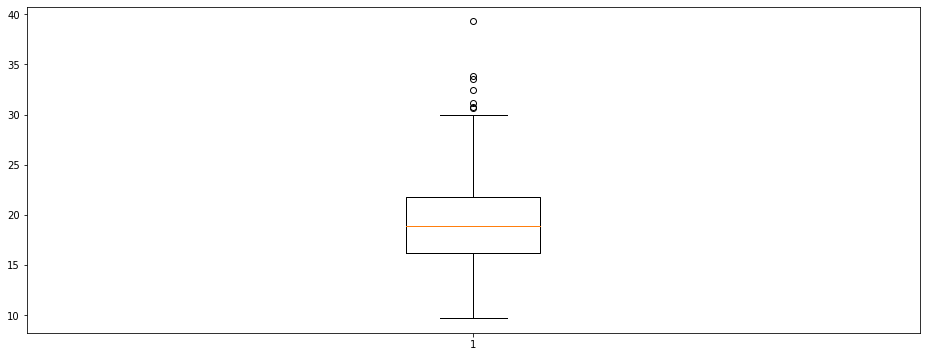

mean perimeter


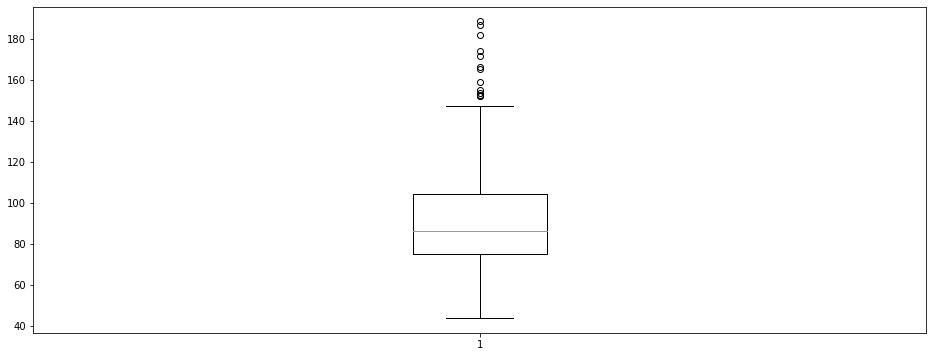

mean area


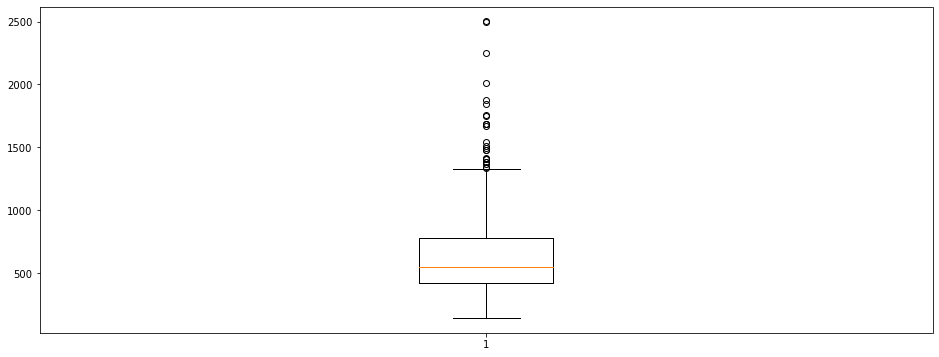

mean smoothness


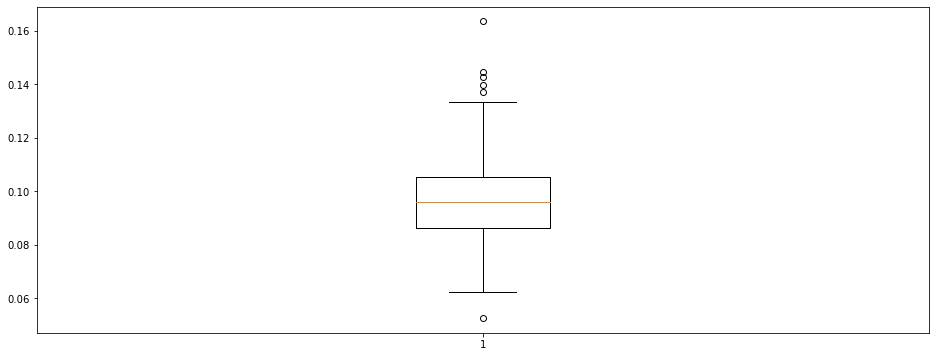

mean compactness


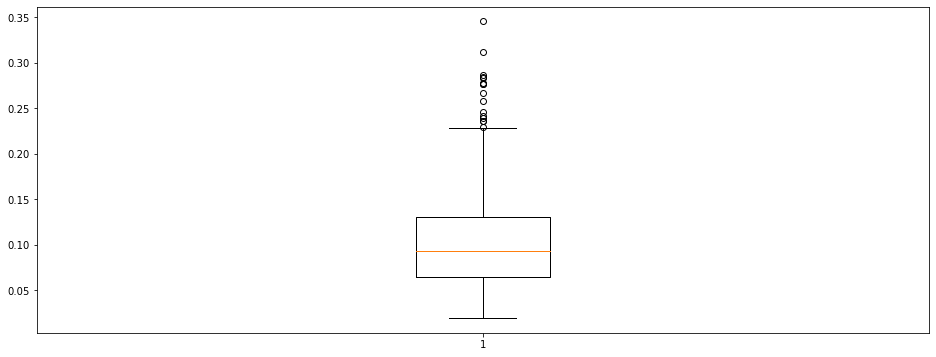

mean concavity


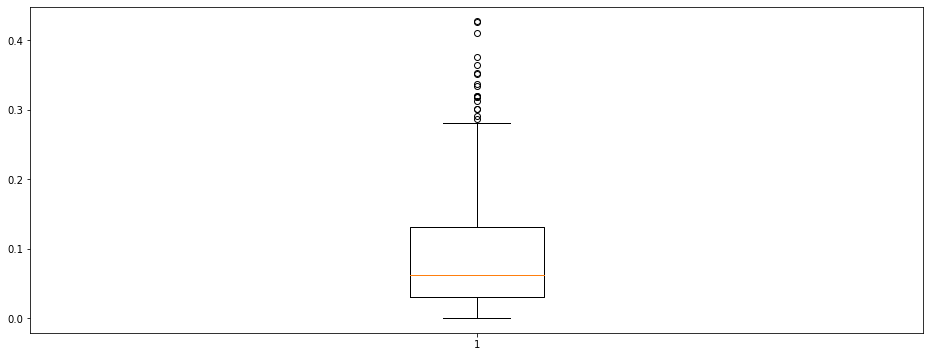

mean concave points


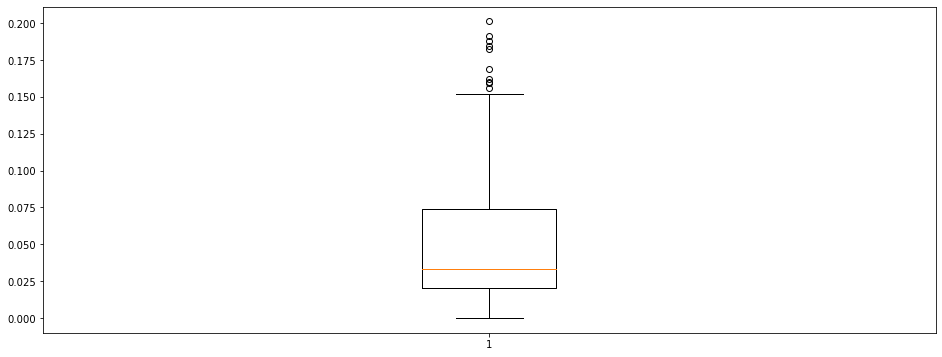

mean symmetry


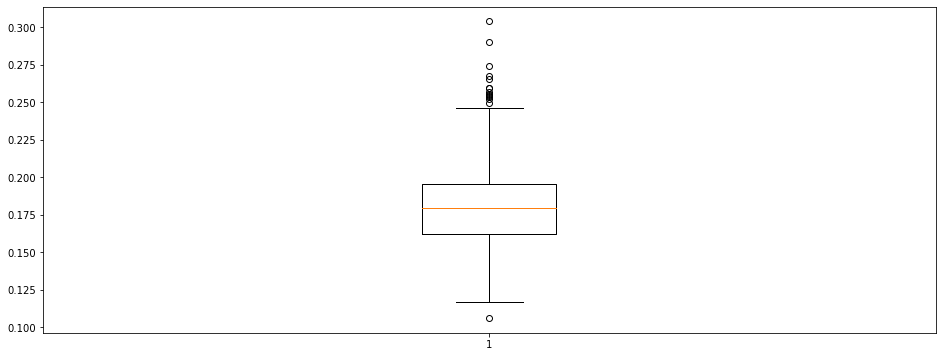

mean fractal dimension


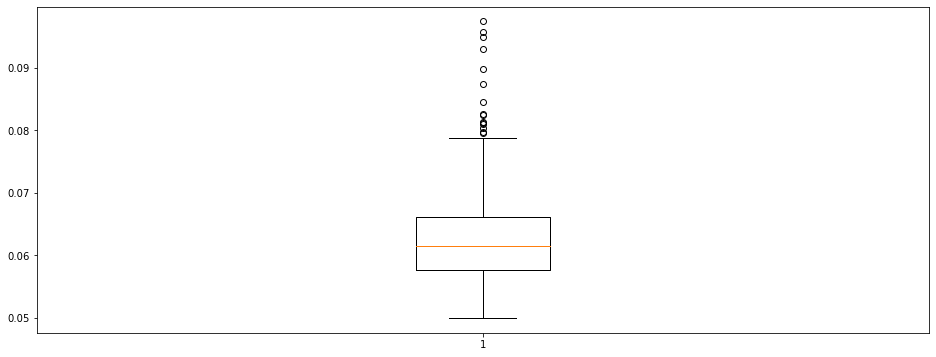

radius error


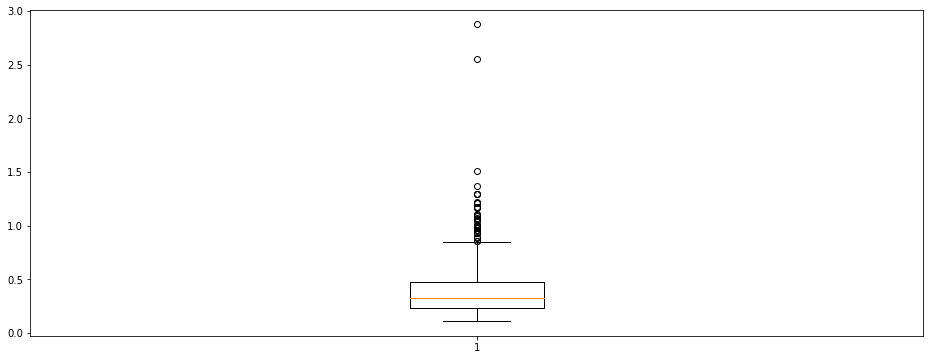

texture error


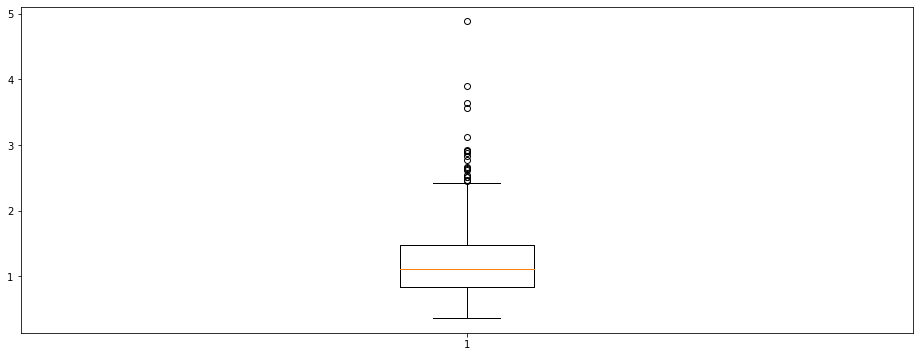

perimeter error


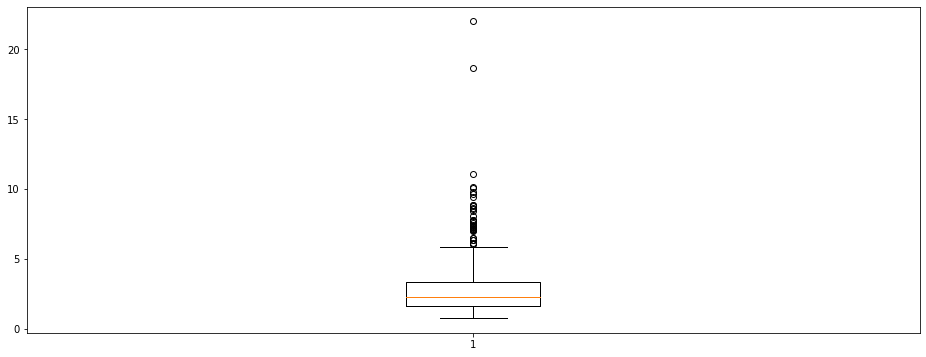

area error


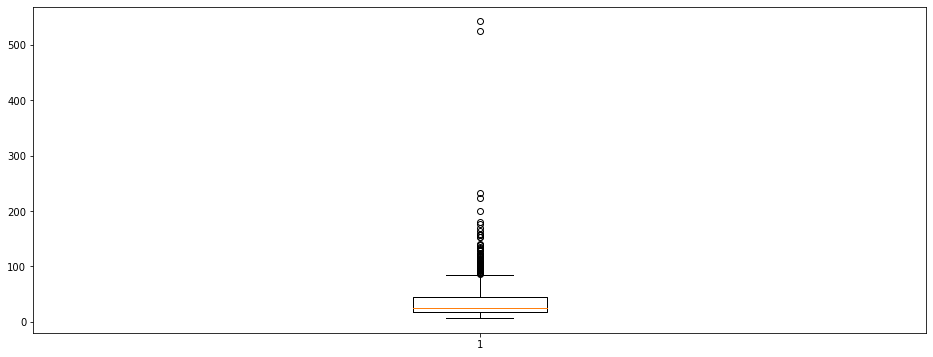

smoothness error


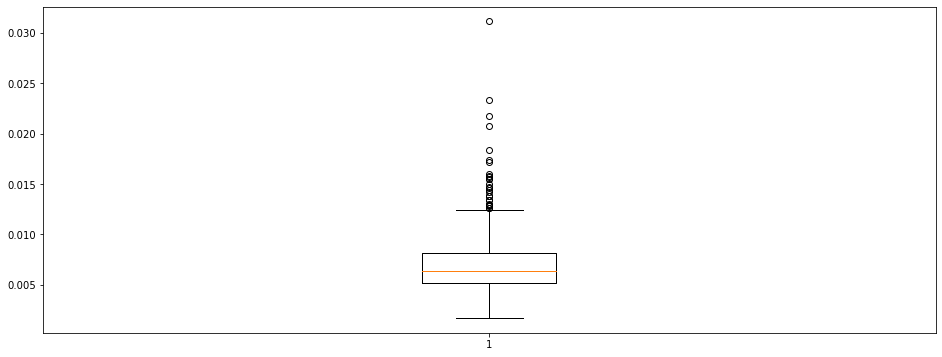

compactness error


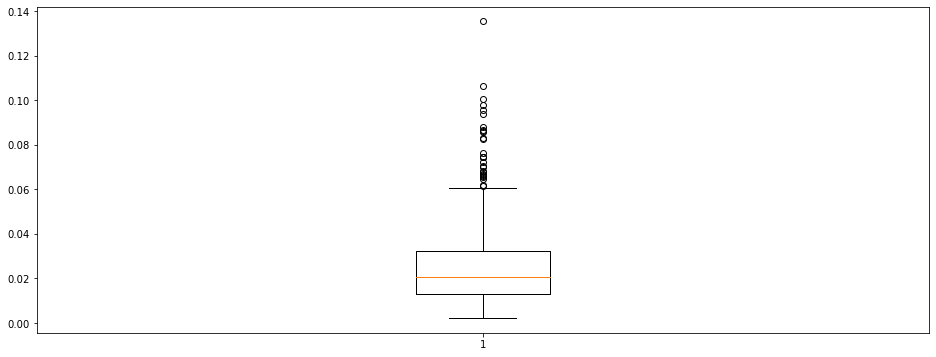

concavity error


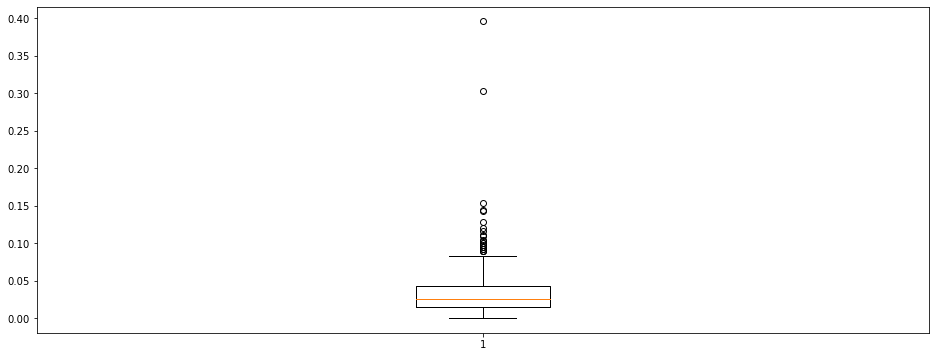

concave points error


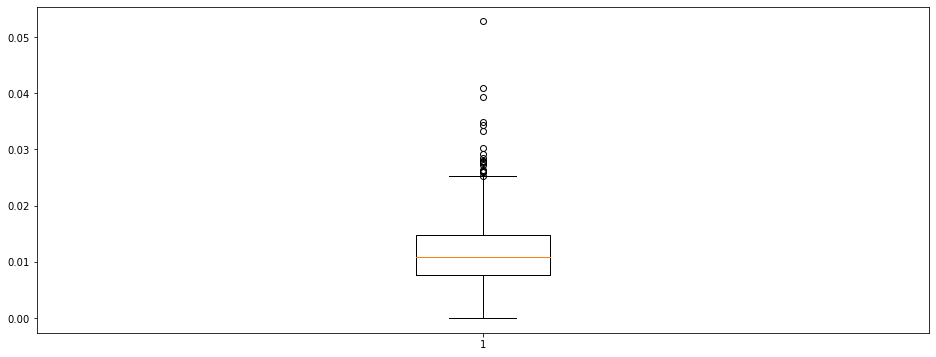

symmetry error


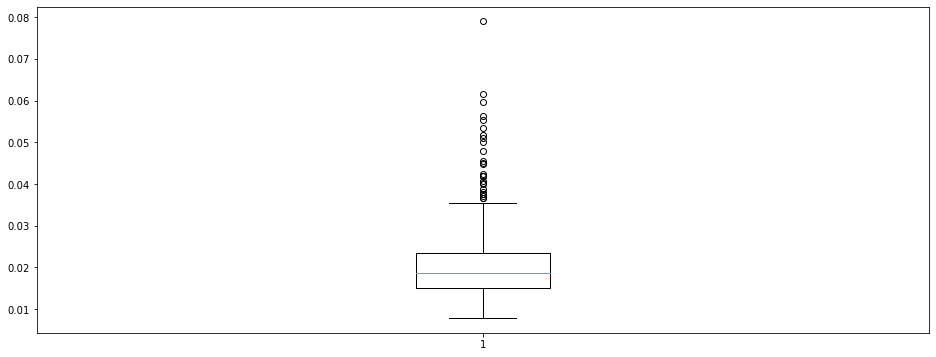

fractal dimension error


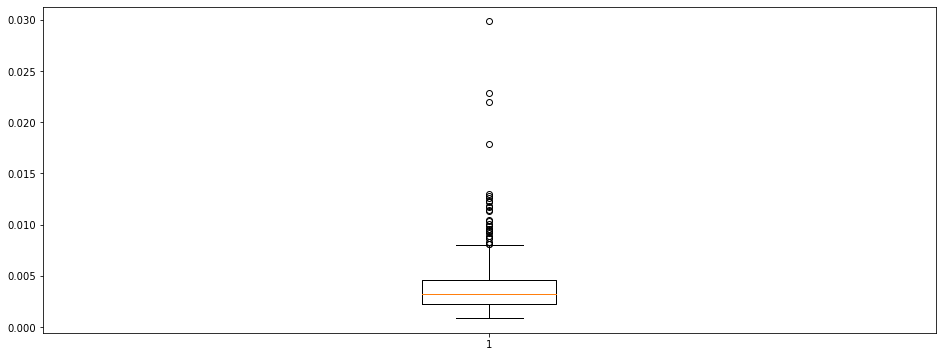

worst radius


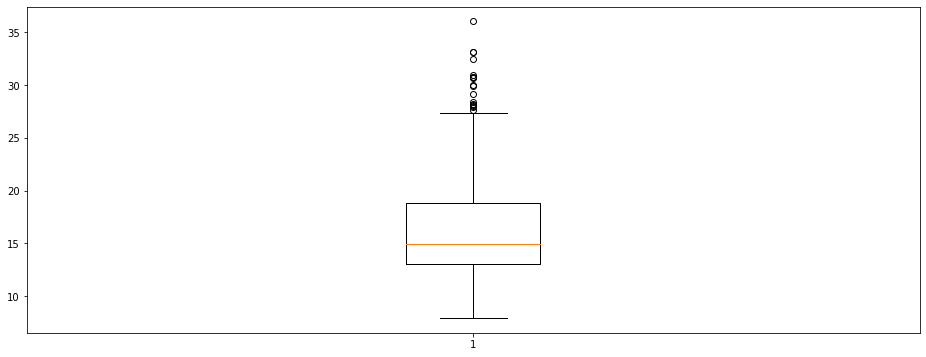

worst texture


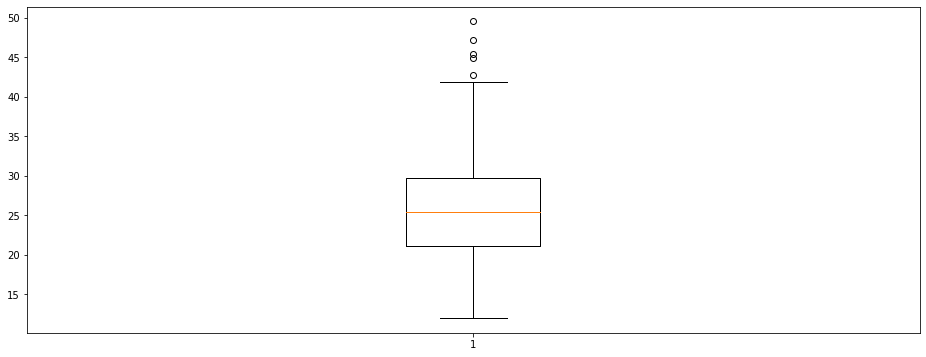

worst perimeter


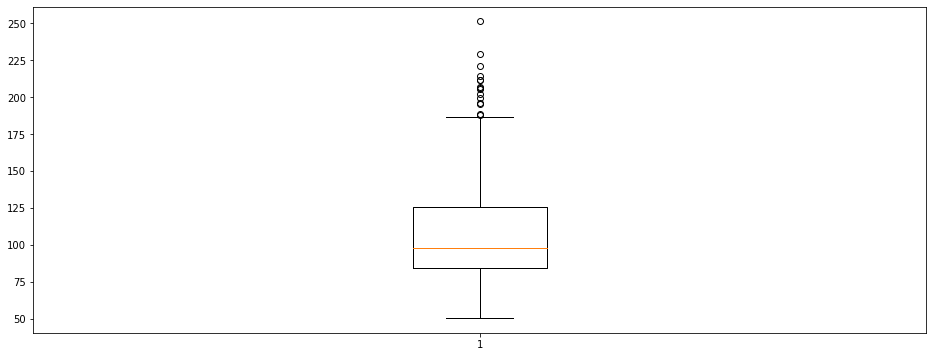

worst area


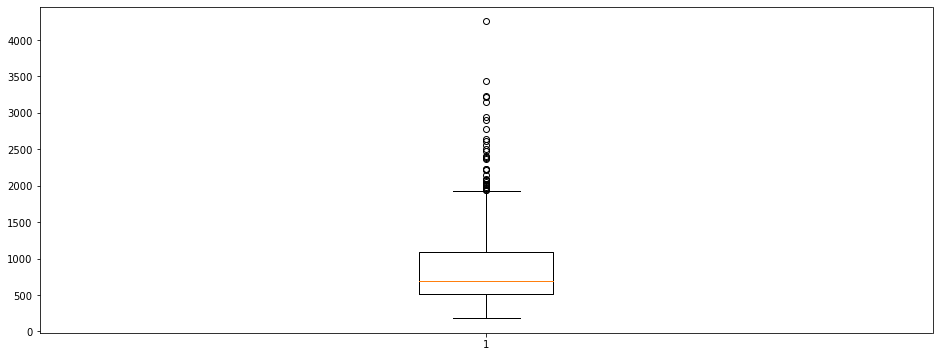

worst smoothness


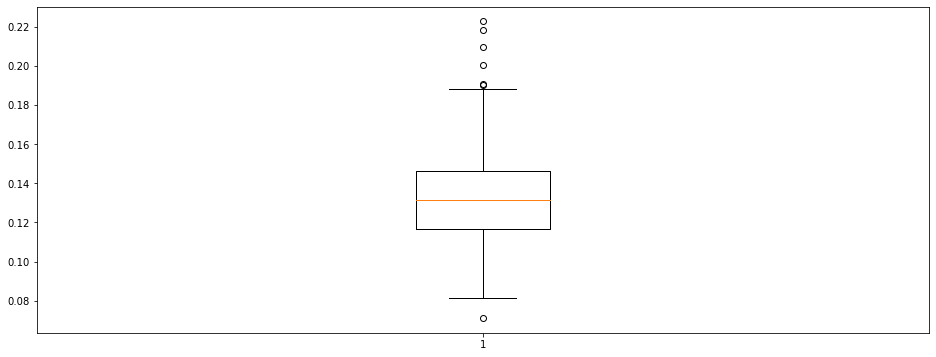

worst compactness


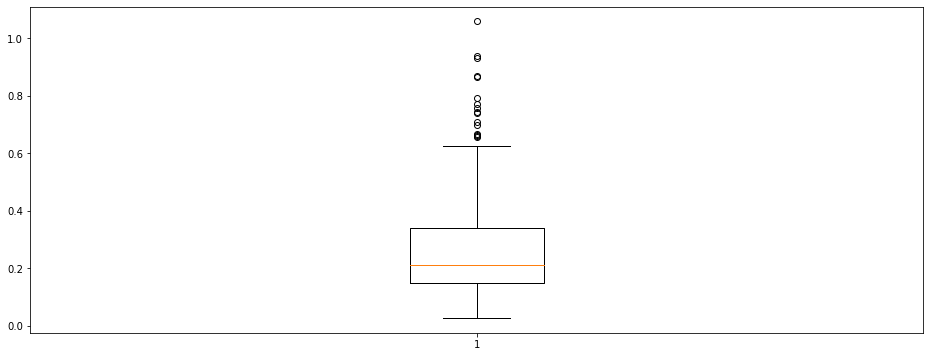

worst concavity


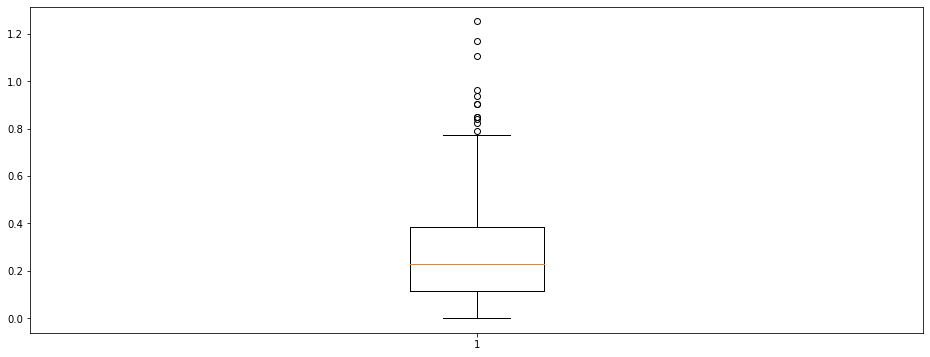

worst concave points


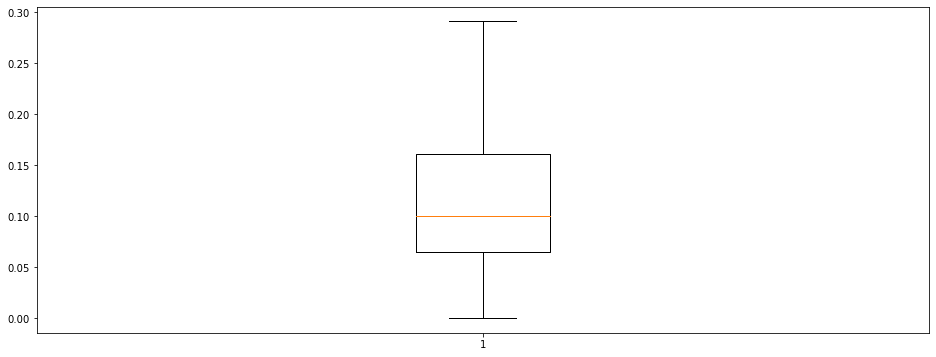

worst symmetry


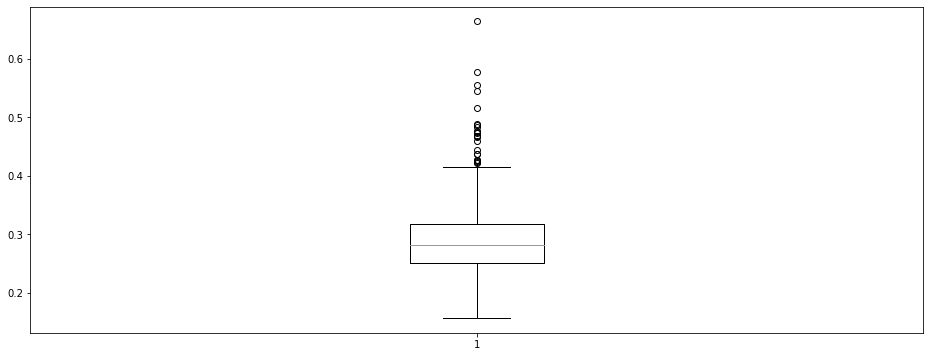

worst fractal dimension


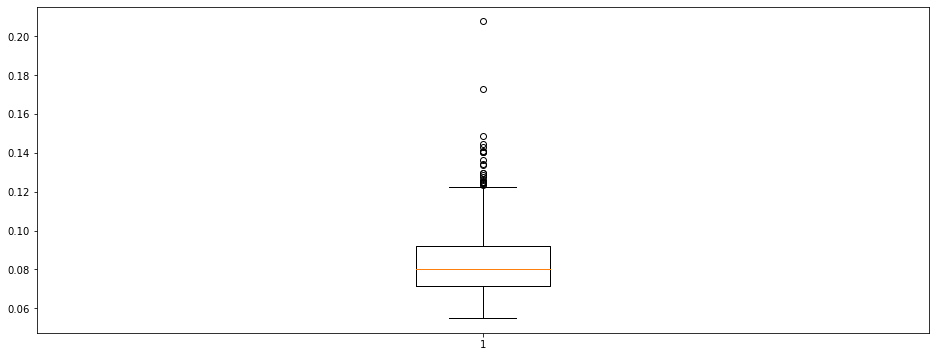

In [16]:
for i in dataset.columns:
    plt.figure(figsize = (16,6))
    print(i)
    plt.boxplot(dataset[i])
    plt.show()

#### Although there are outliers in the dataset i am not removing them, the reason can be seen in the "Breast cancer data - full analysis and modelling" file in the conclusion 

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
dataset_scaled = dataset.copy()
dataset_scaled = scaler.fit_transform(dataset_scaled)
dataset_scaled = pd.DataFrame(dataset_scaled,columns = dataset.columns)

In [20]:
dataset_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [21]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [24]:
X = dataset_scaled
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 21)

In [25]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

y_pred1 = logReg.predict(x_train)
y_pred2 = logReg.predict(x_test)


print("Logistic Regression:")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")

svc = SVC()
svc.fit(x_train,y_train)

y_pred1 = svc.predict(x_train)
y_pred2 = svc.predict(x_test)


print("Support Vector Machine")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")
print("   ")



dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred1 = dtc.predict(x_train)
y_pred2 = dtc.predict(x_test)


print("Decision Tree")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")



rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred1 = rfc.predict(x_train)
y_pred2 = rfc.predict(x_test)


print("Random Forest:")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))
print("   ")
print("   ")
print("   ")
print("   ")



gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred1 = gnb.predict(x_train)
y_pred2 = gnb.predict(x_test)

print("Naive Bayes")
print("Trained data: results")
print("accuracy score",accuracy_score(y_train,y_pred1))
print("confusion matrix")
print(confusion_matrix(y_train,y_pred1))
print("   ")
print("Test data: results")
print("accuracy score",accuracy_score(y_test,y_pred2))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred2))

Logistic Regression:
Trained data: results
accuracy score 0.967032967032967
confusion matrix
[[159  14]
 [  1 281]]
   
Test data: results
accuracy score 0.9736842105263158
confusion matrix
[[36  3]
 [ 0 75]]
   
   
   
Support Vector Machine
Trained data: results
accuracy score 0.9802197802197802
confusion matrix
[[165   8]
 [  1 281]]
   
Test data: results
accuracy score 1.0
confusion matrix
[[39  0]
 [ 0 75]]
   
   
   
   
Decision Tree
Trained data: results
accuracy score 1.0
confusion matrix
[[173   0]
 [  0 282]]
   
Test data: results
accuracy score 0.9298245614035088
confusion matrix
[[36  3]
 [ 5 70]]
   
   
   
Random Forest:
Trained data: results
accuracy score 1.0
confusion matrix
[[173   0]
 [  0 282]]
   
Test data: results
accuracy score 0.9736842105263158
confusion matrix
[[37  2]
 [ 1 74]]
   
   
   
   
Naive Bayes
Trained data: results
accuracy score 0.9362637362637363
confusion matrix
[[156  17]
 [ 12 270]]
   
Test data: results
accuracy score 0.9385964912280

#### we can see that SVC works perfect for the dataset

In [27]:
svc = SVC()
svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

print("Classification Report")
print(classification_report(y_test,y_pred))

print("Accuracy score",accuracy_score(y_test,y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        75

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

Accuracy score 1.0
Confusion Matrix
[[39  0]
 [ 0 75]]


In [28]:
X = dataset_scaled
X_scaled_Accuracy = []
X_scaled_false_positives = []
for i in range(100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = i)
    
    svc = SVC()
    svc.fit(x_train,y_train)

    y_pred = svc.predict(x_test)
    
    X_scaled_Accuracy.append(accuracy_score(y_test,y_pred))
    X_scaled_false_positives.append(confusion_matrix(y_test,y_pred)[0][1])

In [32]:
X_scaled_Accuracy = np.array(X_scaled_Accuracy)
X_scaled_false_positives = np.array(X_scaled_false_positives)
print("scores for 100 random tested data:")
print("overall average accuracy" , X_scaled_Accuracy.mean())
print("overall false Positive average", X_scaled_false_positives.mean())

scores for 100 random tested data:
overall average accuracy 0.977017543859649
overall false Positive average 1.93


#### Note:  
##### Visit "Breast cancer data - full analysis and modelling" in the same repisotory for detailed analysic on everything(different algorithms and datasets)